In [2]:
#Data preprocessing of feature Engineering
#1)Check for Duplicate variables or columns
#2)Check for Single value columns,whole column only single value 
#Describe in Python min=0,max=0,mean=0,median=0
#3) Missing value imputation - To be done only if atleast 70% of column data is available.
#If a variable has greater than 70% missing values impute with words like "missing" or "Not Available"
#Numeric variable - impute with mean or median
#categorical or non numerical variable - Mode imputation
#Algorothm based imputation
#a) Multivariate Imputation using chained equations(MICE) -Both Numeric and Non Numeric simultaneously
#b)Tree based imputation methods -Decision Tree or Random forest
#c) K Nearest Neighbours - KNN Imputer(Distance based)
#Probabilistic Principal Component Analysis
#4) Data Transformation - Dependent variables and Independent variables
#Dependent variable-if skewness is there 
#+ve skewness - Logarthemic or square root transformation
#-ve skewness - Exponential or power transformations
#Independent variables -
#Standard scaling or standardisation - (x mean )/std - z score
#Standard scaling will be done when independent variables are in different Mathematical units
#Normalisation or Min Max scaling - (X-min)/(X-Max) will scale all values 

In [3]:
import io
%cd "E:\Imarticus\PGA18\PYTHON"

E:\Imarticus\PGA18\PYTHON


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
bmtrain=pd.read_csv("train_v9rqX0R.csv")

In [6]:
bmtest=pd.read_csv("test_AbJTz2l.csv")

In [7]:
print(bmtrain.shape)
print(bmtest.shape)

(8523, 12)
(5681, 11)


In [8]:
bmtrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
bmtest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
# for preprocessing combine both train and test  data. For concatenation no. of variables must be equal,
#add dependent variable to test data 
bmtest["Item_Outlet_Sales"]='test'

In [11]:
combinedf=pd.concat([bmtrain,bmtest],axis=0)
#axis=0 is row concatenation 
#axis=1 is column concatenation

In [12]:
combinedf.shape

(14204, 12)

In [13]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
combinedf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [15]:
combinedf.isnull().sum().sort_values(ascending=False)

Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing")

In [18]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium     4655
Missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [19]:
combinedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [20]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.median())

In [21]:
combinedf.Item_Weight.describe()

count    14204.000000
mean        12.759739
std          4.234851
min          4.555000
25%          9.300000
50%         12.600000
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

In [22]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [23]:
combinedf["Item_code"]=combinedf.Item_Identifier.apply(lambda x:x[0:2])

In [24]:
combinedf.Item_code.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_code, dtype: int64

In [25]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [26]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [27]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace('reg','Regular')

In [28]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
combinedf.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [30]:
zerovisible=combinedf[combinedf.Item_Visibility==0]

In [31]:
zerovisible.shape

(879, 13)

In [32]:
combinedf.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [33]:
combinedf.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [34]:
combinedf.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [35]:
combinedf['Outlet_age']=2021-combinedf.Outlet_Establishment_Year

In [36]:
combinedf.Outlet_age.describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_age, dtype: float64

In [37]:
combinedf.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [38]:
combinedf.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [54]:
numericcols=combinedf.select_dtypes(include=np.number)
objectcols=combinedf.select_dtypes(include=["object"])

In [55]:
objectcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_code'],
      dtype='object')

In [56]:
numericcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_age'],
      dtype='object')

In [57]:
numericcols["Item_Outlet_Sales"]=objectcols.Item_Outlet_Sales

C:\Users\Omprakash\AppData\Local\Temp/ipykernel_12684/2502089491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcols["Item_Outlet_Sales"]=objectcols.Item_Outlet_Sales


In [58]:
objectcols=objectcols.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
#axis = 1 is column dropping
#axis = 0 is row dropping

In [59]:
#Dummy encode or Label Encode Non Numeric Object Data
objectcolsdummy=pd.get_dummies(objectcols)

In [60]:
print(objectcols.shape)
print(objectcolsdummy.shape)

(14204, 7)
(14204, 42)


In [61]:
objectcolsdummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [62]:
numericcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_age', 'Item_Outlet_Sales'],
      dtype='object')

In [63]:
numericcols=numericcols.drop('Outlet_Establishment_Year',axis=1)

In [64]:
combinedfclean=pd.concat([numericcols,objectcolsdummy],axis=1)
#column concatenation

In [65]:
combinedfclean.shape

(14204, 47)

In [67]:
bigmarttraindf=combinedfclean[combinedfclean.Item_Outlet_Sales!='test']
bigmarttestdf=combinedfclean[combinedfclean.Item_Outlet_Sales=='test']

In [68]:
bigmarttestdf=bigmarttestdf.drop('Item_Outlet_Sales',axis=1)

In [71]:
bigmarttraindf.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_age                           int64
Item_Outlet_Sales                  float64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Iden

In [70]:
bigmarttraindf.Item_Outlet_Sales=pd.to_numeric(bigmarttraindf.Item_Outlet_Sales)

C:\Users\Omprakash\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:ylabel='Item_Outlet_Sales'>

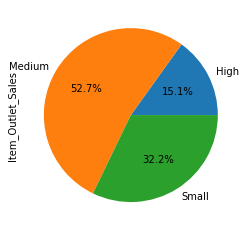

In [125]:
bmtrain.Item_Outlet_Sales.groupby(bmtrain.Outlet_Size).sum().plot(kind="pie",autopct="%1.1f%%")

<AxesSubplot:ylabel='Item_Outlet_Sales'>

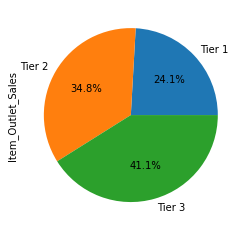

In [126]:
bmtrain.Item_Outlet_Sales.groupby(bmtrain.Outlet_Location_Type).sum().plot(kind="pie",autopct="%1.1f%%")

<AxesSubplot:xlabel='Item_Type'>

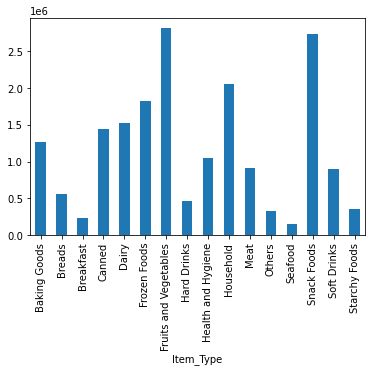

In [127]:
bmtrain.Item_Outlet_Sales.groupby(bmtrain.Item_Type).sum().plot(kind="bar")

In [114]:
#What is the Average Item_Outlet_Sales for different Outlet_Type?
bmtrain.Item_Outlet_Sales.groupby(bmtrain.Outlet_Type).mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [116]:
#Test NULL Average Item_Outlet_Sales for different Outlet_Type 
gs=bmtrain[bmtrain.Outlet_Type=="Grocery Store"]
st1=bmtrain[bmtrain.Outlet_Type=="Supermarket Type1"]
st2=bmtrain[bmtrain.Outlet_Type=="Supermarket Type2"]
st3=bmtrain[bmtrain.Outlet_Type=="Supermarket Type3"]

In [117]:
from scipy.stats import f_oneway

In [118]:
f_oneway(gs.Item_Outlet_Sales,st1.Item_Outlet_Sales,st2.Item_Outlet_Sales,st3.Item_Outlet_Sales)
# Since p-value is less than 0.05 REJECT NULL

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

In [119]:
#What is Average Item_Outlet_Sales by different Outlet_Location_Type?
bmtrain.Item_Outlet_Sales.groupby(bmtrain.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [121]:
t1=bmtrain[bmtrain.Outlet_Location_Type=="Tier 1"]
t2=bmtrain[bmtrain.Outlet_Location_Type=="Tier 2"]
t3=bmtrain[bmtrain.Outlet_Location_Type=="Tier 3"]

In [122]:
f_oneway(t1.Item_Outlet_Sales,t2.Item_Outlet_Sales,t3.Item_Outlet_Sales) 
# Since p-value is less than 0.05 REJECT NULL

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

In [ ]:
# test null there is no association b/w outlet typr and outlet location type

In [123]:
from scipy.stats import chi2_contingency

In [124]:
chi2_contingency(pd.crosstab(bmtrain.Outlet_Type,bmtrain.Outlet_Location_Type))
#since p- value is less than 0.05 REJECT NULL

(4725.606588766826,
 0.0,
 6,
 array([[ 303.43822598,  353.88419571,  425.67757832],
        [1562.58078141, 1822.35656459, 2192.062654  ],
        [ 260.00985568,  303.23594978,  364.75419453],
        [ 261.97113692,  305.52328992,  367.50557315]]))

In [84]:
y=bigmarttraindf.Item_Outlet_Sales  # Dependent Variable
X=bigmarttraindf.drop('Item_Outlet_Sales',axis=1) #Indeoendent Variable

<AxesSubplot:ylabel='Frequency'>

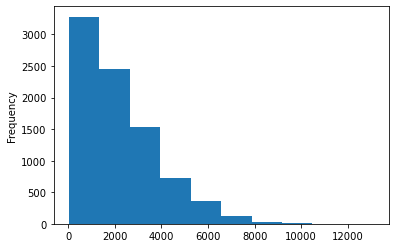

In [85]:
y.plot(kind='hist')

<AxesSubplot:>

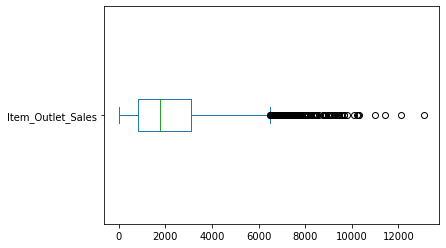

In [86]:
y.plot(kind="box",vert=False)

<AxesSubplot:ylabel='Density'>

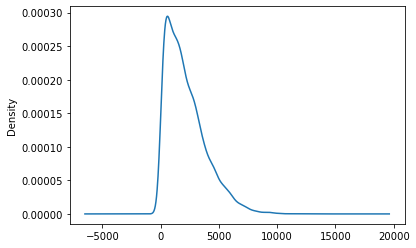

In [87]:
y.plot(kind='density')

In [88]:
print(y.skew())
print(y.kurt())

1.1775306028542796
1.6158766814287264


In [91]:
#Supervised Learning - Regression Models
#Multiple Linear Regression explains a linear relationship b/w a dependent variable(y) and multiple independent variables (X)
#Multiple Linear Regression is an equation y=B0+B1X1+B2X2+B3X3+.........+BnXn+Et

#Matrix Formulation of Multiple Linear regression 
#[B0,B1,B2,....,Bn]=(X`*X)^-1*X`*y
#X`- transpose of X
#X - Independent variables

In [92]:
#Interpretetion of output in Python
#1) R square explains the amount of variance caused in dependent variable by the model or Independent variables.
#preferred range(0.6-0.9)
#2)Intercept + coefficients
#coefficient means one unit change in the variable will lead to coefficient value change in dependent variable 
#Diagnostic for all Regression Models
#Root mean square error (RMSE)


In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
reg=LinearRegression()

In [96]:
regmodel=reg.fit(X,y)

In [98]:
regmodel.score(X,y) # r SQUARE -0.563773

0.5637737001510252

In [100]:
regmodel.intercept_

-577.1596763296416

In [102]:
print(list(zip(X.columns,regmodel.coef_)))

[('Item_Weight', -0.5200273627393368), ('Item_Visibility', -300.0670763007762), ('Item_MRP', 15.570635789832687), ('Outlet_age', 14.3742284804206), ('Item_Fat_Content_Low Fat', -21.059166195449148), ('Item_Fat_Content_Regular', 21.059166195452505), ('Item_Type_Baking Goods', -3.2104710018473472), ('Item_Type_Breads', 1.9250378206217258), ('Item_Type_Breakfast', 3.9839650536804196), ('Item_Type_Canned', 22.271905888700818), ('Item_Type_Dairy', -53.00446586276468), ('Item_Type_Frozen Foods', -31.253550501582133), ('Item_Type_Fruits and Vegetables', 26.51372579752215), ('Item_Type_Hard Drinks', -47.26078009769694), ('Item_Type_Health and Hygiene', 4.423071407524767), ('Item_Type_Household', -24.342665740883756), ('Item_Type_Meat', -3.858079857798199), ('Item_Type_Others', -6.538845577655864), ('Item_Type_Seafood', 181.66630948761173), ('Item_Type_Snack Foods', -14.60831128652173), ('Item_Type_Soft Drinks', -74.89160051671654), ('Item_Type_Starchy Foods', 18.184754987789375), ('Outlet_Iden

In [103]:
regpredict=regmodel.predict(X)

In [104]:
regpredict

array([4009.76011104,  562.5129848 , 2369.82262179, ..., 1525.94416664,
       1394.19304552, 1209.38313357])

In [107]:
regresidual=y-regpredict

In [109]:
regresidual

0       -274.622111
1       -119.090185
2       -272.552622
3       -341.004532
4         85.776022
           ...     
8518    -643.383109
8519   -1171.108098
8520    -332.830567
8521     451.404554
8522    -443.713134
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [110]:
np.sqrt(np.mean(regresidual**2))

1127.0330147429918